In [12]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [13]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '/home/opimentel/tesis/astro-lightcurves-handler/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.524[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.524[mbs]
─────────────────────────────────────────────────────────────────────

In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'd_days'])
LCDataset(
(raw - samples 628)
 - samples: 628 - obs samples: 25,745 (g: 11,424 - r: 14,321)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.984375}
   |▎       | SLSN - 20/628 (3.18%)
   |█████▋  | SNIa - 449/628 (71.50%)
   |▍       | SNIbc - 32/628 (5.10%)
   |█▌      | merSNII - 127/628 (20.22%)
(raw_train - samples 501)
 - samples: 501 - obs samples: 20,429 (g: 8,970 - r: 11,459)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.98828125}
   |▎       | SLSN - 16/501 (3.19%)
   |█████▋  | SNIa - 359/501 (71.66%)
   |▍       | SNIbc 

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


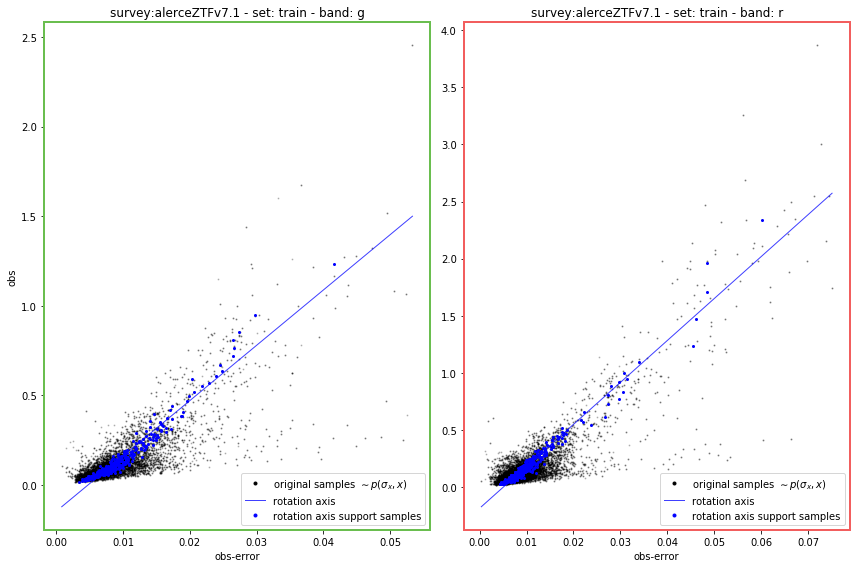

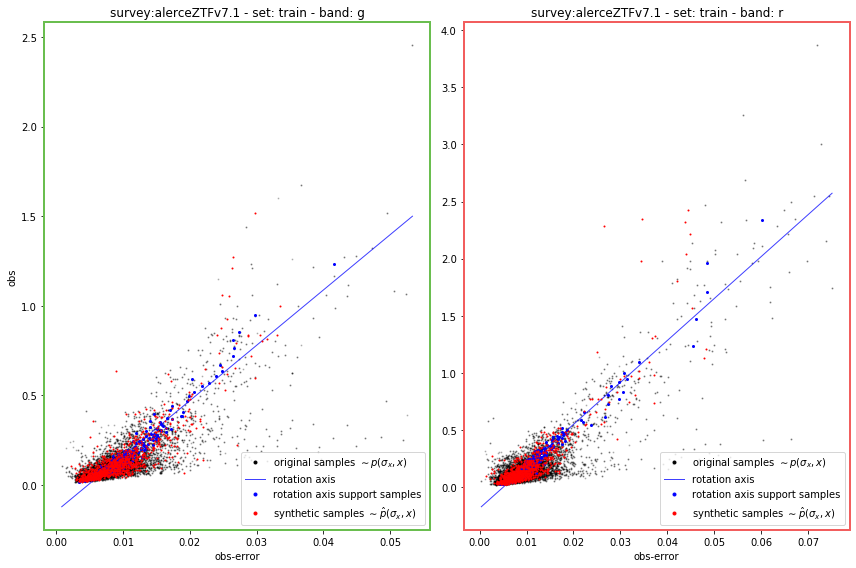

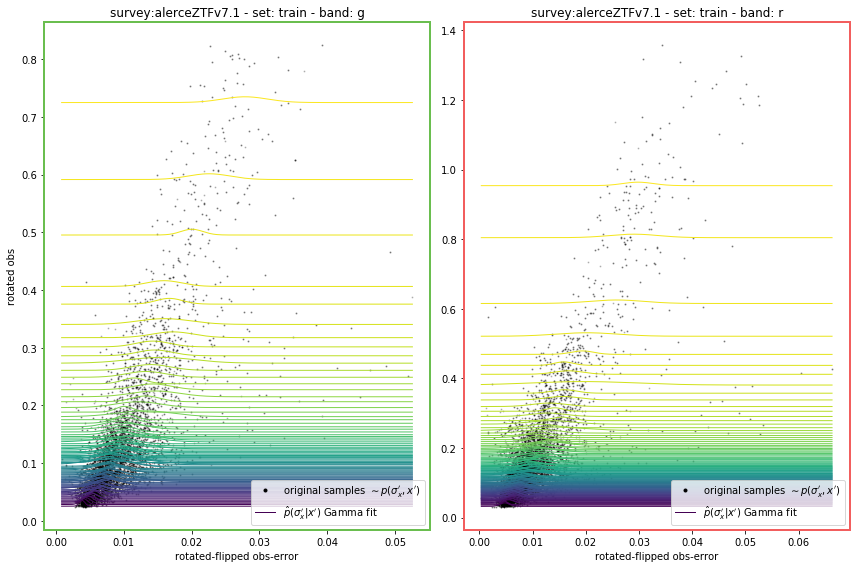

In [21]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


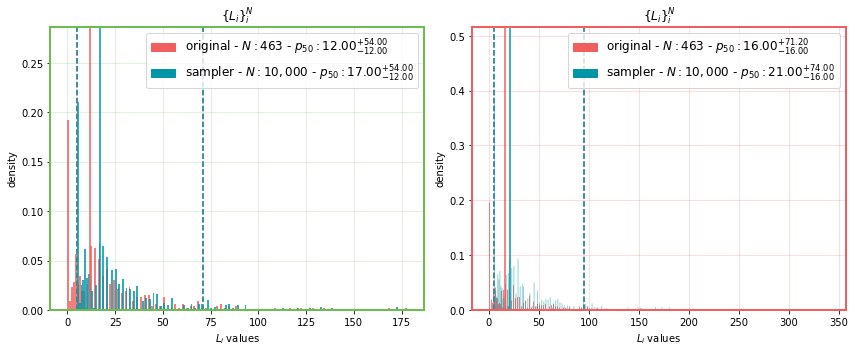

In [22]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
from lchandler.plots.plots import plot_length_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
offset = 5
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b, offset) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


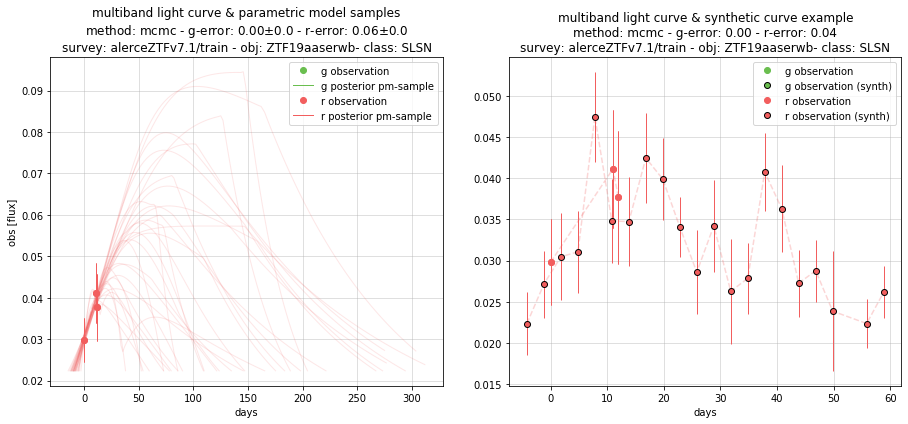

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


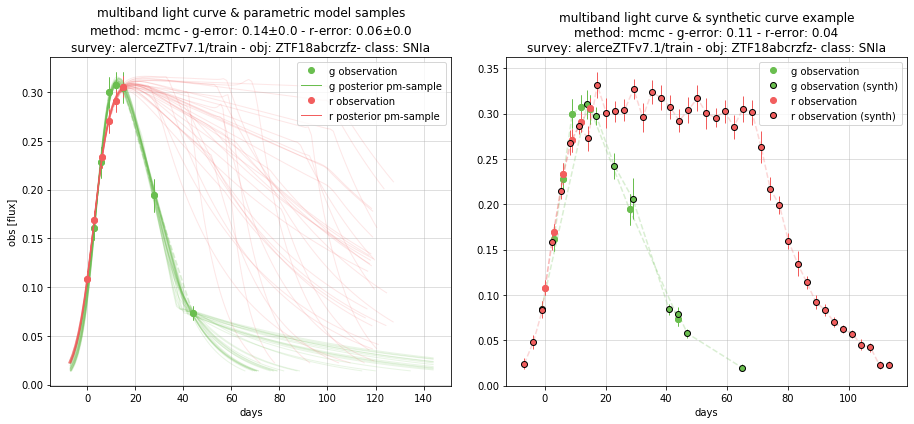

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


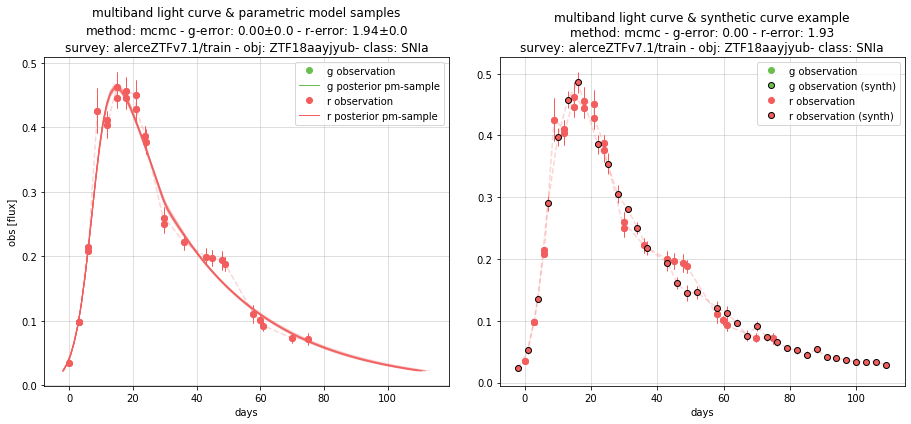

INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/opimentel/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.9-64/lock_dir/lock


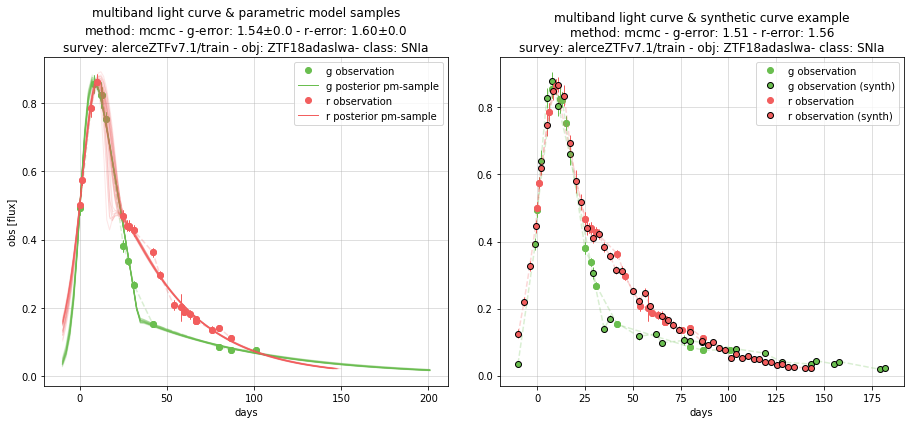

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import GEN_CDICT
from lchandler.plots.lc import plot_synthetic_samples

method = 'curve_fit'
method = 'mcmc'
set_name = 'train'
new_bounds = 1
save_rootdir = '/home/opimentel/tesis/astro-lightcurves-handler/save'
save_rootdir = None
synthetic_samples_per_curve = 32

lcset = lcdataset[set_name]
ignored_names = [
    #'ZTF18acwvcbz',
    #'ZTF18abslpjy',
    #'ZTF18acvvppd',
]
risky_names = [
    'ZTF19aaserwb',
    'ZTF18abcrzfz',
    'ZTF18aayjyub',
    'ZTF18adaslwa',
    'ZTF18adbyxua',
    'ZTF19aahsnmq',
]
for lcobj_name in ignored_names+risky_names:
    #lcobj_name = lc_set.get_random_lcobj_name() # random
    lcobj = lcset[lcobj_name]
    band_names = lcset.band_names
    class_names = lcset.class_names
    sne_generator = GEN_CDICT[method](lcobj, class_names, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
    new_lcobjs, new_lcobjs_pm, fit_errors_bdict = sne_generator.sample_curves(synthetic_samples_per_curve)
    plot_kwargs = {
        'fit_errors_bdict':fit_errors_bdict,
        'save_rootdir':save_rootdir,
    }
    plot_synthetic_samples(lcdataset, set_name, method, lcobj_name, new_lcobjs, new_lcobjs_pm, **plot_kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_mcmc_trace

plot_mcmc_trace(sne_generator.mcmc_trace_bdict, 'g')

# generate synth data

In [31]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import generate_synthetic_dataset

sd_kwargs = {
    'synthetic_samples_per_curve':128,
    #'method':'curve_fit',
    'method':'mcmc',
    'ignored_lcobj_names':ignored_names,
    'save_rootdir':'/home/opimentel/tesis/astro-lightcurves-handler/save',
}
errors = generate_synthetic_dataset(lcdataset, 'train', obse_sampler_bdict, length_sampler_bdict, **sd_kwargs)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  1%|          | 3/463 [31.76s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acnnevs]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|          | 4/463 [89.47s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamrais]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|▏         | 6/463 [113.03s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aafljiq]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 7/463 [138.17s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abshezu]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 9/463 [95.64s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaeopgw] 

The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 11/463 [93.04s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamhhiz] 

The estimated number of effective samples is smaller than 200 for some parameters.


  3%|▎         | 14/463 [67.79s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acyxnyw]

The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▎         | 17/463 [110.97s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aauivtj]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▍         | 18/463 [132.02s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aayjyub]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▍         | 19/463 [112.81s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgqjln]

The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▍         | 20/463 [111.48s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acxphhl]

The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▍         | 21/463 [109.37s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adbyxua]

The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▍         | 22/463 [91.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aahjymt] 

The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▍         | 23/463 [109.56s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aautzif]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  5%|▌         | 24/463 [97.32s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaezwmr] 

The estimated number of effective samples is smaller than 200 for some parameters.


  6%|▌         | 26/463 [92.83s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF20aamknxn]

The estimated number of effective samples is smaller than 200 for some parameters.


  6%|▌         | 27/463 [97.89s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acdwazf]

The estimated number of effective samples is smaller than 200 for some parameters.


  6%|▌         | 28/463 [85.27s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abiztut]

The estimated number of effective samples is smaller than 200 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


  6%|▋         | 29/463 [103.39s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18adaslwa]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  7%|▋         | 32/463 [104.62s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acnfjyw]


KeyboardInterrupt: 

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)